NYC Air Bnb Analysis 

1 - Data Collection and Processing 

2 - Data Exploration and Visualization

3 - Model Exploration and model Selection 

4 - Implementation of selected model 

5 - Performace, Evaluation and Intepretation

# **Exploratory Data Analysis **

In [13]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

In [14]:

import pandas as pd
from google.colab import files
file = files.upload()
df1 = pd.read_csv('AB_NYC_2019.csv')

Saving AB_NYC_2019.csv to AB_NYC_2019 (1).csv


In [5]:
#Dropping columns 
df1.drop(['id', 'host_id'], axis=1, inplace=True)
df1.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


Size of the data is large.
There are two features from the columns id and host_id are not necessary coz pandas already set indexes to whole data

**Statistical Analysis **

In [6]:
#Average price - Max Price -  Min Price
print("Average Price of Airbnb in New York City is: ")
print(df1['price'].mean())
print("\nMax Price: ")
print(df1["price"].max())
print("\nMin Price: ")
print(df1['price'].min())

Average Price of Airbnb in New York City is: 
152.7206871868289

Max Price: 
10000

Min Price: 
0


Airbnb are providing rooms in very cheap price. Average price of Airbnb in $152.72 but difference between maximum price and minimum price is quite high.

In [7]:
df1['price'].value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

Above values are describing that most of the values are now in common range, that means there are outliers present.

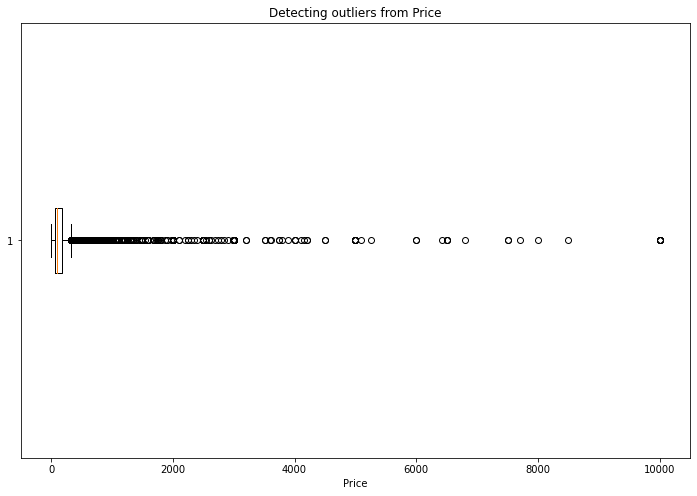

In [8]:
#Detecting outliers 
plt.figure(figsize=(12,8))
plt.boxplot(df1["price"], vert=False)
plt.title("Detecting outliers from Price")
plt.xlabel('Price')
plt.show()

Identifying outliers with interquartile range for the other factors.

In [9]:
# First Quartile
Q1 = df1.quantile(0.25)
Q2 = df1.quantile(0.75)
IQR = Q2 - Q1
print("InterQuartile Range: ")
print(IQR)

InterQuartile Range: 
latitude                            0.073015
longitude                           0.046795
price                             106.000000
minimum_nights                      4.000000
number_of_reviews                  23.000000
reviews_per_month                   1.830000
calculated_host_listings_count      1.000000
availability_365                  227.000000
dtype: float64


From above, we can see that the IQR of Price and avaibility_365are very large. 

In [10]:
#Using quantile for computing and replacing the outliers.
# Percentiles 
print("10th percentile of price: ")
print(df1["price"].quantile(0.10))
print("90th percentile of price: ")
print(df1["price"]. quantile(0.90))
print("\nSkewness of the price attributes: ")
print(df1["price"].skew())

10th percentile of price: 
49.0
90th percentile of price: 
269.0

Skewness of the price attributes: 
19.118938995046033


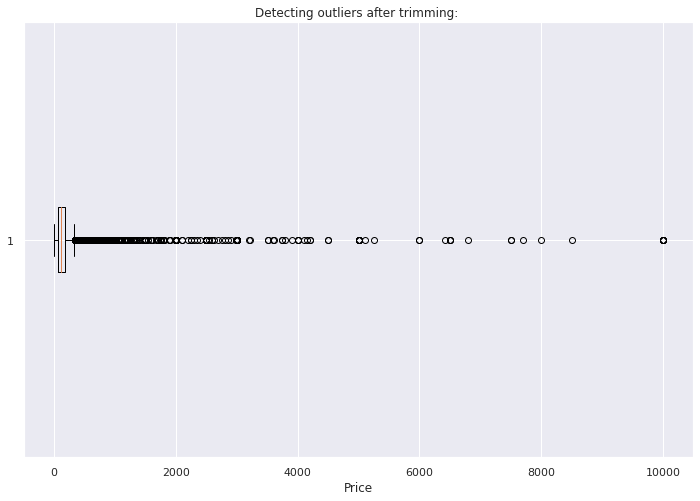

In [146]:
plt.figure(figsize=(12,8))
plt.boxplot(df1["price"], vert=False)
plt.title("Detecting outliers after trimming: ")
plt.xlabel('Price')
plt.show()

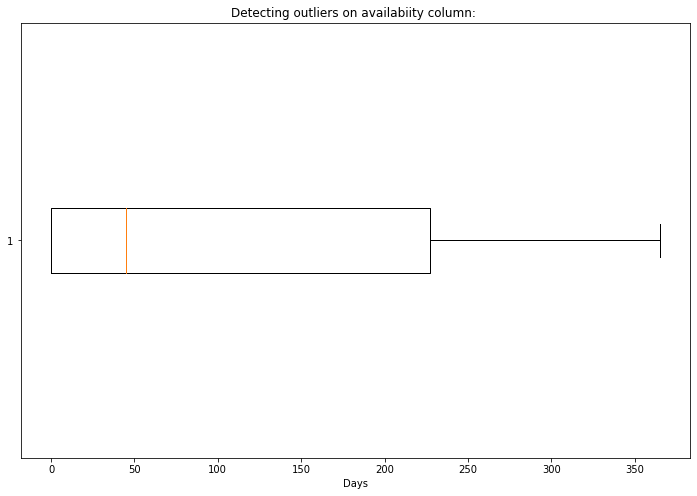

In [11]:
# Detecting outliers for availability 
plt.figure(figsize=(12,8))
plt.boxplot(df1["availability_365"], vert=False)
plt.title("Detecting outliers on availabiity column: ")
plt.xlabel('Days')
plt.show()

Exploratory Data Analysis 

In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_name                       48874 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     38843 non-null  object 
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_count  

In [149]:
#Null Values 
df1.isnull().sum()

name                                 16
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [150]:
#Dropping null values 
df1.isnull().sum()
df1.dropna(how='any', inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            38821 non-null  object 
 1   host_name                       38821 non-null  object 
 2   neighbourhood_group             38821 non-null  object 
 3   neighbourhood                   38821 non-null  object 
 4   latitude                        38821 non-null  float64
 5   longitude                       38821 non-null  float64
 6   room_type                       38821 non-null  object 
 7   price                           38821 non-null  int64  
 8   minimum_nights                  38821 non-null  int64  
 9   number_of_reviews               38821 non-null  int64  
 10  last_review                     38821 non-null  object 
 11  reviews_per_month               38821 non-null  float64
 12  calculated_host_listings_count  

In [151]:
#Dropping columns 
df1.drop(['name', 'host_name', 'last_review'],axis=1,inplace=True)

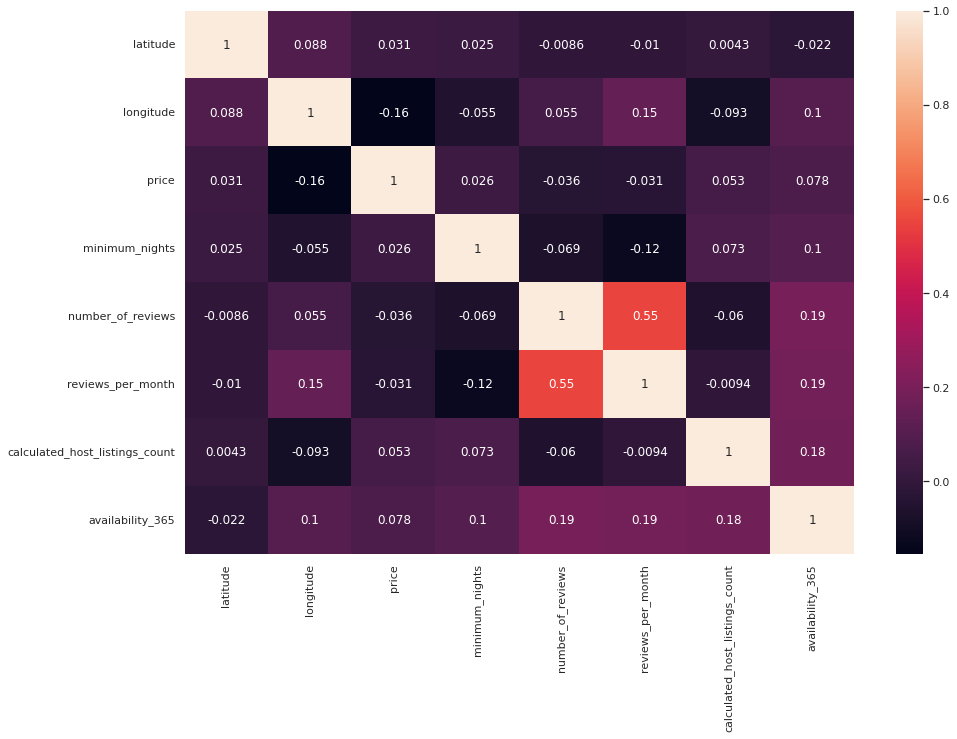

In [152]:
#Correlation matrix 
corr = df1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [153]:
df1.drop(['number_of_reviews', 'reviews_per_month'], axis=1, inplace=True)
df1.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,1,129


# **Data Visualization**

In this module we will visaualize the dataset and interpret and draw correlation between target and predictor variables.

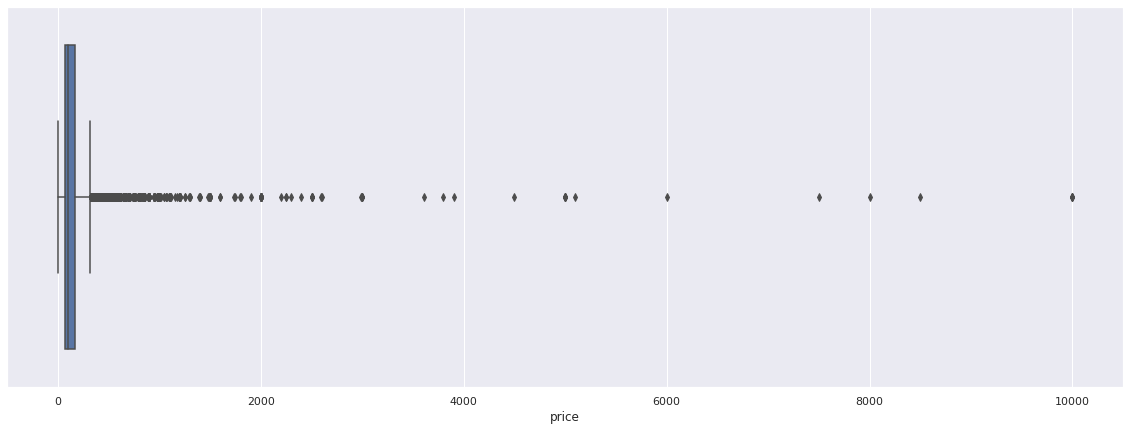

In [154]:
import seaborn as sns 
plt.figure(figsize=(20,7))
sns.boxplot(x= df1['price'])

Text(0.5, 1.0, 'Prices for each neighberhood_group')

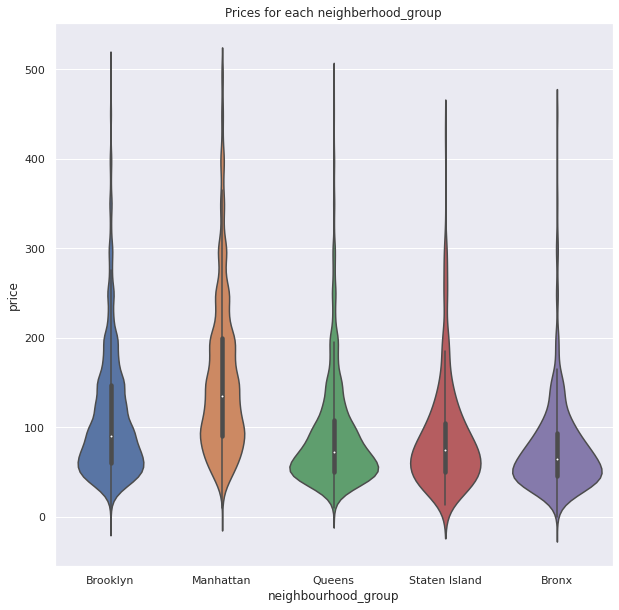

In [155]:
#creating a sub-dataframe with no extreme values / less than 500
price_500=df1[df1.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=price_500, x='neighbourhood_group', y='price')
viz_2.set_title('Prices for each neighberhood_group')

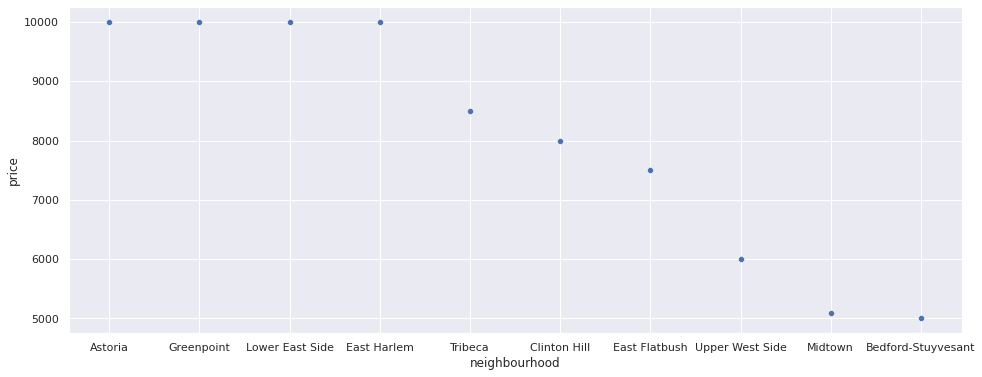

In [156]:
#showing top 10 neighbourhoods with highsest prices
plt.figure(figsize=(16,6))
sns.scatterplot( x='neighbourhood', y='price', data = df1.sort_values('price', ascending=False).head(10))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1440x720 with 0 Axes>

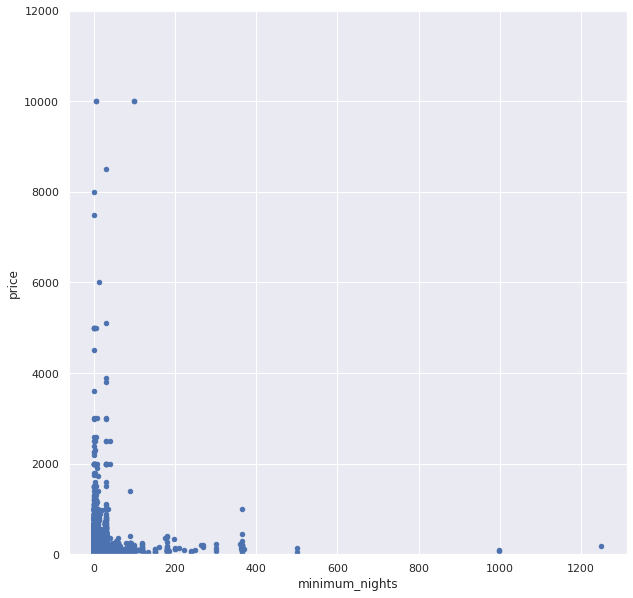

In [157]:
#scater plot for minimum nights 
plt.figure(figsize = (20,10))
df1.plot.scatter(x='minimum_nights', y='price', ylim=(0,12000))
plt.show()

From the above scatter plot we can see that, majoriity of poeple want to book air bnb for 1-100 days only. 

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhood group!')

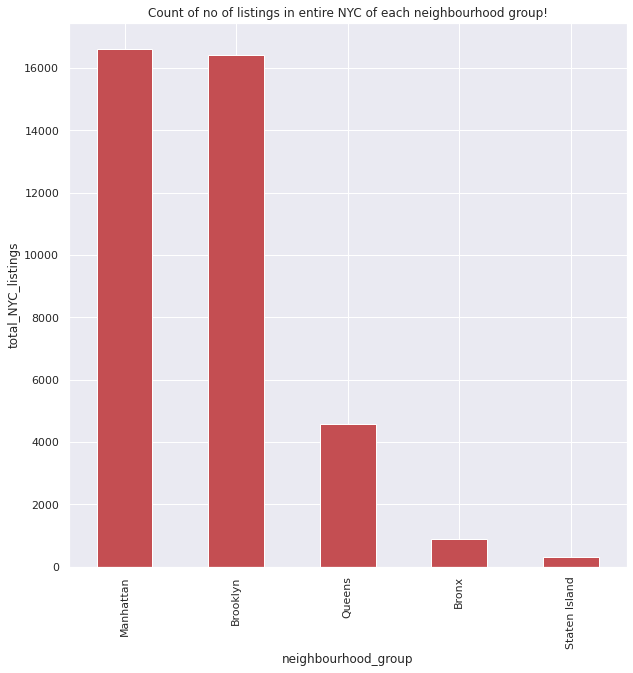

In [158]:
#the neighbourhood group 'Manhattan' has the highest no of listings in entire NYC! 
df1['neighbourhood_group'].value_counts().plot(kind='bar',color='r')
plt.xlabel('neighbourhood_group')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood group!')

The above bar graph shows  that Manhattan is the most popular neighbourhood group amonngst the other neighbourhoods. 

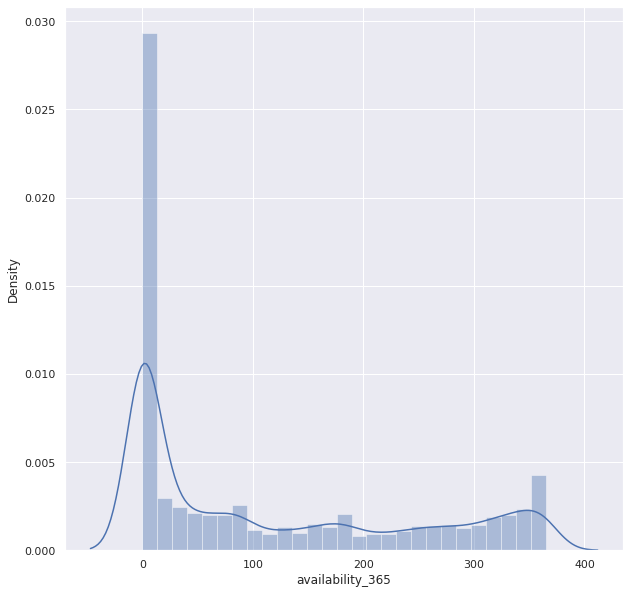

In [159]:
#distribution of listings availability at NYC!
sns.distplot(df1['availability_365'])

In [168]:
df1.columns

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'calculated_host_listings_count', 'availability_365'],
      dtype='object')

This histogram, shows us the availability_365 of rooms from all the neighbourhood groups.  We can analyse that airbnbs have maximum avaiblity of rooms for 1-100 days. 

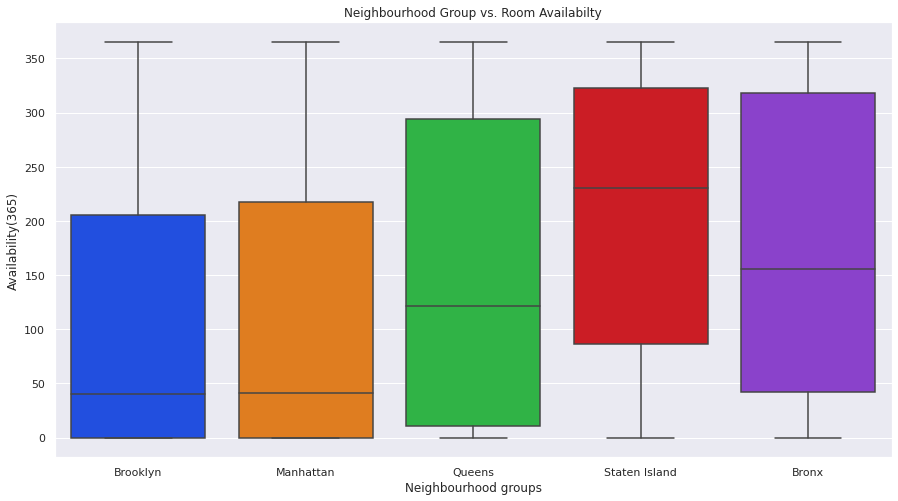

In [170]:
#avaibility of rooms according to various neighbourhood gropus 
f,ax = plt.subplots(figsize=(15,8))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=df1,palette="bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

The above is the box plot of AirBnbs in the NYC city. From this figure, we can see that Staten Island neighbouhood group 

Text(0.5, 1.0, 'Location Co-ordinates')

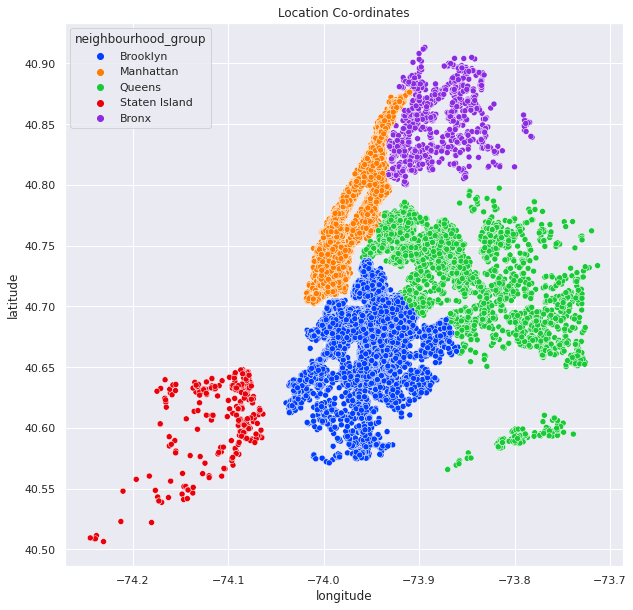

In [161]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (10, 10)})
ax= sns.scatterplot(data=df1, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

From this map we can see the coordinates of the various AirBnbs in the NYC. Maxium number of AirBnBs can be found in popular areas such as Brooklyn and Queens. 

In [162]:
#finding out top 10 neighbourhoods
df1.neighbourhood.value_counts().head(10)

Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
East Village          1489
Upper West Side       1482
Upper East Side       1405
Crown Heights         1265
Midtown                986
Name: neighbourhood, dtype: int64

We can see that Williamsburg and Bedford-Stuyvesant are the most popular neighbourhoods.

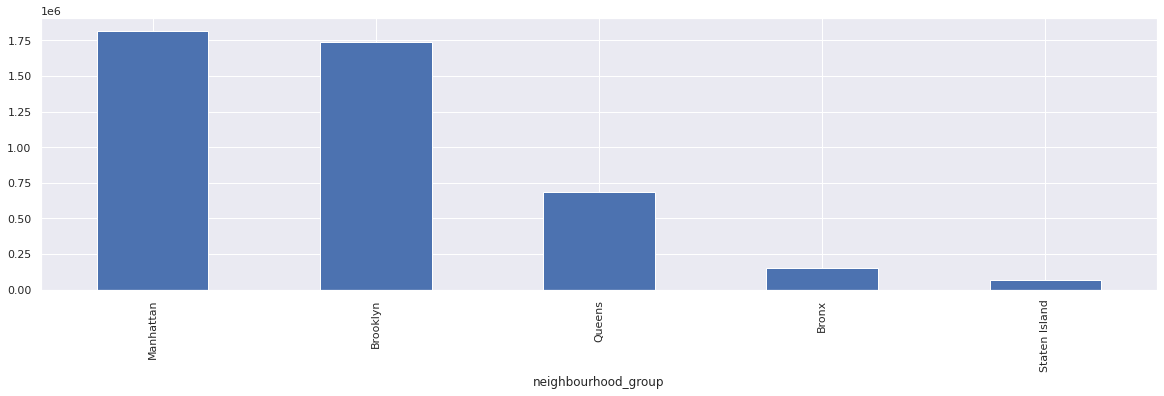

In [173]:
plt.subplots(figsize=(20,5))
df1.groupby(by = 'neighbourhood_group', axis=0)['availability_365'].sum().nlargest(10).plot(kind = 'bar')

The above is a bar chart which shows the avaibility_365 of rooms according to the various neighbourhood in NYC

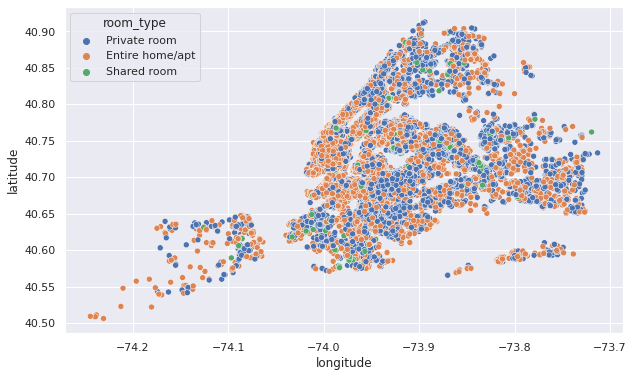

In [164]:
#Map of Room Type according to Latitute and Longitude
plt.figure(figsize=(10,6))
sns.scatterplot(df1.longitude, df1.latitude, hue=df1.room_type)
plt.ioff()

The above map shows us that maximum number of Airbnbs are either Private Rooms or Entire home/apt. 

In [165]:
df1.drop(['neighbourhood'], axis =1 , inplace = True)

Text(0.5, 1.0, 'Room Type Preferences')

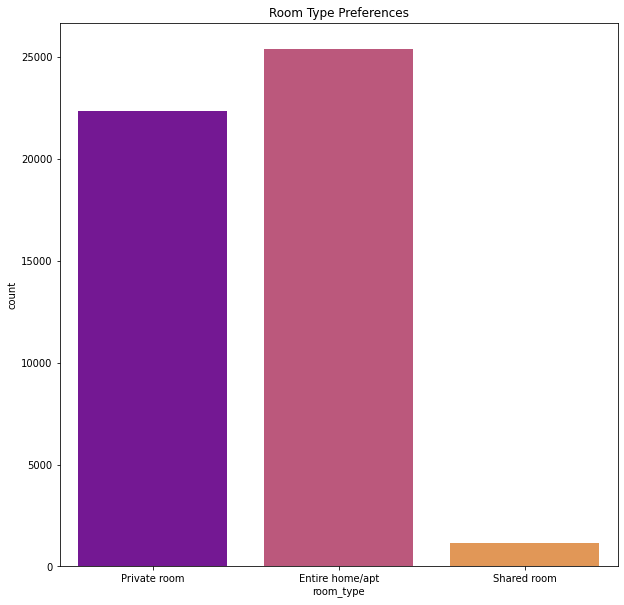

In [12]:
#Restaurants delivering online or not
sns.countplot(df1['room_type'],palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title("Room Type Preferences")

People are intrested in Private Room and Entire home/ room_type

## Data Preprocessing and Feautre Selection 

Converting columns having dtypes of object 

In [122]:
#Converting them to numbers by encoding them 
def Encode(data):
    for column in data.columns[data.columns.isin(['neighbourhood_group', 'room_type'])]:
        data[column] = data[column].factorize()[0]
    return data

df = Encode(df1.copy())

In [123]:
final_df = df.copy()
final_df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,40.64749,-73.97237,0,149,1,6,365
1,1,40.75362,-73.98377,1,225,1,2,355
3,0,40.68514,-73.95976,1,89,1,1,194
4,1,40.79851,-73.94399,1,80,10,1,0
5,1,40.74767,-73.97500,1,200,3,1,129


In [124]:
#Checking the percentage weightage of each quantile
for i in list(final_df.columns):
  iqr=final_df[i].quantile(0.75)-final_df[i].quantile(0.25)
  lower_boundary=final_df[i].quantile(0.25)-0.1*iqr
  upper_boundary=final_df[i].quantile(0.75)+0.1*iqr

  outlier_cnt = len(final_df[final_df[i]> upper_boundary]) + len(final_df[final_df[i]< lower_boundary])
  outlier_pct = (outlier_cnt * 100) / len(final_df)

  print(f"The column `{i}` has {outlier_cnt} outliers percentage {outlier_pct}")

The column `neighbourhood_group` has 5761 outliers percentage 14.839906236315397
The column `latitude` has 14790 outliers percentage 38.09793668375364
The column `longitude` has 16231 outliers percentage 41.809845186883386
The column `room_type` has 846 outliers percentage 2.1792328894155224
The column `price` has 14870 outliers percentage 38.30401071584967
The column `minimum_nights` has 9054 outliers percentage 23.322428582468252
The column `calculated_host_listings_count` has 7730 outliers percentage 19.911903351278948
The column `availability_365` has 8644 outliers percentage 22.266299167976097


In [125]:
#Handling the oultiers 
column_list=list(final_df.columns)
for i in column_list:
    iqr=final_df[i].quantile(0.75)-final_df[i].quantile(0.25)
    lower_boundary=final_df[i].quantile(0.25)-(iqr*0.1)
    upper_boundary=final_df[i].quantile(0.75)+(iqr*0.1)
    final_df.loc[final_df[i]>upper_boundary,i]=upper_boundary
    final_df.loc[final_df[i]<lower_boundary,i]=lower_boundary


In [126]:
#Seperating independent and dependent variables 
X = final_df.drop(['price'],axis=1)
y = final_df['price']

In [127]:
X.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,0.0,40.681205,-73.97237,0.0,1.0,2.1,251.9
1,1.0,40.753620,-73.98377,1.0,1.0,2.0,251.9
3,0.0,40.685140,-73.95976,1.0,1.0,1.0,194.0
4,1.0,40.770425,-73.94399,1.0,4.3,1.0,0.0
5,1.0,40.747670,-73.97500,1.0,3.0,1.0,129.0


In [128]:
#Splitting data into training and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# **Model Implementation** 

In [129]:
#Linear Regression 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R^2 score: {r2}')
print(f'MAE score: {mae}')
print(f'MSE score: {mse}')

R^2 score: 0.5104467179178168
MAE score: 25.791948959926305
MSE score: 1091.7697133289166


In [130]:
#Decsion Tree Regressor
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)

y_pred = DTree.predict(X_test)

DTree_score = DTree.score(X_test, y_test)
print(DTree_score)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R^2 score: {r2}')
print(f'MAE score: {mae}')
print(f'MSE score: {mse}')

0.49181120148832536
R^2 score: 0.49181120148832536
MAE score: 24.008711165145424
MSE score: 1133.329423322949


In [131]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
    y_pred = model.predict(X_test)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test,y_pred))
    

In [132]:
#Applying neural network model 
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(random_state=1, max_iter=500,hidden_layer_sizes=(5,2))
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R^2 score: {r2}')
print(f'MAE score: {mae}')
print(f'MSE score: {mse}')

R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434


In [26]:
#Applying KNN classifier model 
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=i)
  reg.fit(X_train, y_train)

  y_pred = reg.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)

  print(f'K value: {i}')
  print('*' * 20)
  print(f'R^2 score: {r2}')
  print(f'MAE score: {mae}')
  print(f'MSE score: {mse}')

K value: 1
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 2
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 3
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 4
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 5
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 6
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 7
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 8
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 9
*************

In [174]:
#Applying KNN classifier model 
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  reg.fit(X_train, y_train)

  y_pred = reg.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)

  print(f'K value: {i}')
  print('*' * 20)
  print(f'R^2 score: {r2}')
  print(f'MAE score: {mae}')
  print(f'MSE score: {mse}')

K value: 1
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 2
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 3
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 4
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 5
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 6
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 7
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 8
********************
R^2 score: 0.4249946483731877
MAE score: 29.207106016034736
MSE score: 1282.3393303342434
K value: 9
*************

In [27]:
# check xgboost version
import xgboost as xgb
reg = xgb.XGBRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R^2 score: {r2}')
print(f'MAE score: {mae}')
print(f'MSE score: {mse}')

[14:51:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 score: 0.6184339188764529
MAE score: 22.342182100373396
MSE score: 850.9437200226142
